# COMP9016 - Assignment 2
## Mike Leske - R00183658

---
<strong style="color: red;">Important Note:</strong>

> **This notebook expects the same folder structure as used for assignment 1:**  <p>
> `../aima-python/AssignmentTwoSubmissions/<initials_studentID>/ML_R00183658.ipynb`
>  
> Hence, `sys.path.append('../..')` is used to import AIMA modules from 2 folders up.
    
---
    
<br>

In [1]:
import sys
sys.path.append('../..')

from probability import *

import numpy as np
import pandas as pd

import random
random.seed(123456789)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="darkgrid")

<br>

---

## 1.1 PROBABILITY DISTRIBUTION TABLE - 5 MARKS

Each tip is considered a independent variable that is defined by the provided answers.  
Therefore, t1..t3 have been implemented as AIMA ProbDist objects with the associated event occurences.

In [2]:
t1 = ProbDist('Tip1', {'never':  1, 'rarely': 4, 'sometimes':  6, 'often': 12, 'always': 23})
t2 = ProbDist('Tip2', {'never': 12, 'rarely': 4, 'sometimes': 12, 'often':  4, 'always':  2})
t3 = ProbDist('Tip3', {'never': 24, 'rarely': 2, 'sometimes':  5, 'often':  4, 'always':  4})

<br>

The AIMI code ProbDist class automatically calculates probabilities from the absolute values provided above.

In [3]:
print(t1.prob)
print(t2.prob)
print(t3.prob)

{'never': 0.021739130434782608, 'rarely': 0.08695652173913043, 'sometimes': 0.13043478260869565, 'often': 0.2608695652173913, 'always': 0.5}
{'never': 0.35294117647058826, 'rarely': 0.11764705882352941, 'sometimes': 0.35294117647058826, 'often': 0.11764705882352941, 'always': 0.058823529411764705}
{'never': 0.6153846153846154, 'rarely': 0.05128205128205128, 'sometimes': 0.1282051282051282, 'often': 0.10256410256410256, 'always': 0.10256410256410256}


<br>

Next, a single pandas Dataframe can be created from the probability values of the 3 ProbDist objects.  
seaborn can print the dataframe with color coding to visualize the probability distribution.

In [4]:
distTable = pd.DataFrame(data=t1.prob.values(), index=t1.prob.keys(), columns=['Tip1'])
distTable['Tip2'] = t2.prob.values()
distTable['Tip3'] = t3.prob.values()
#print(distTable)

cm = sns.light_palette("blue", as_cmap=True)
sns_distTable = distTable.style.background_gradient(cmap=cm)
sns_distTable

,Tip1,Tip2,Tip3
never,0.0217391,0.352941,0.615385
rarely,0.0869565,0.117647,0.0512821
sometimes,0.130435,0.352941,0.128205
often,0.26087,0.117647,0.102564
always,0.5,0.0588235,0.102564


<br>

pandas can also plot a bar diagram from the dataframe.

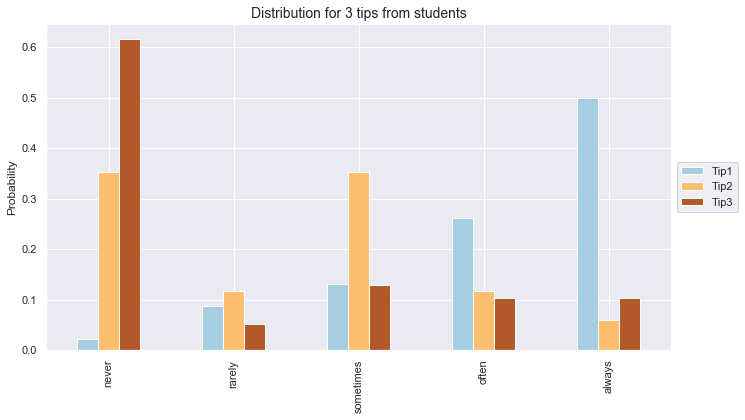

In [5]:
ax = distTable.plot.bar(figsize=(14,6), cmap="Paired")
ax.set_title('Distribution for 3 tips from students', fontsize=14)
ax.set_ylabel('Probability')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<br>

---

## 1.2 BAYESIAN NETWORKS - 20 MARKS

You have been given the following Random Variables:
- Fossil Fuels
- AI
- GlobalWarming
- Renewable Energy
- Traffic
- Employed

Construct a model of the world using these variables (Note: this is subjective but there should  
be a rationale behind your world view and your thought process articulated). Implement a  
Bayesian Network using the BayesNet class from the AIMA.
- Provide a visual depiction of the network
- Detail the associated Conditional Probability Tables.
- Demonstrate querying the network.

### Visual depiction and rational

![](./ML_R00183658_EXTRA_DIR/bayesian_net_climate.png)



**The central question to predict is whether a powerful form of AI will be developed soon.**  

The uprising of such strong **AI** depends on 2 critical factors: 
1. The **Employment** of all CIT AI students and 
2. the **Global Warming**.

> **Note**: The event "Global Warming" is treated as crossing the 2 degree celsius threshold.

<br>

Clearly, when all CIT AI students are employed and work towards achieving strong AI, there is a high probabality we will see strong **AI**.  

However, **Global Warming** has the potential for unseen social and economic changes that may result in riots, unemployment and many other progression-limiting outcomes.

> To be precise, if we can prevent Global Warming then chances are high all CIT AI students will be employed in a research-friendly economy.   
> Likewise, the prevention of Global Warming provides a good general economic ecosystem for strong AI to arise.  
> If we cannot  prevent Global Warming all hell breaks loose and the unemployment of CIT AI students will only be a minor problem.  
> In general, there won't be much resources left for anyone to work on AI. But CIT AI students can still make the difference if they find employment.

As we know it, **Global Warming** is related to "traffic"/mobility and the energy mix mankind uses.  

> A high amount of **Traffic** may or may not increase the risk of global warming. It still depends on how vehicles are powered.  
But being able to drastically reduce traffic, will certainly have a positive effect on fighting Global Warming.  
Here, the probability of **Traffic** expressed the believe that personal traffic can be drastically reduced, e.g. more public transport, car sharing...

> Reducing the emissions from **Fossil Fuels** has a strong impact whether Global Warming will happen.  
Unfortunately many people in industry and politics enjoy smoking dirty coal in Shisha bars after work. Sigh.  
Here, the probability of **Fossil Fuels** expresses the believe that policy makers find ways for mankind to drastically reduce the usage of Fossil Fuels.

> If we are able to develop rich sources of **Renewable Energy** and make them available, then even a high amount of Traffic will not 
neccessarily lead to Global Warming.  
Here, the probability of **Renewable Energy** expresses the believe that we'll develop technology so that Renewable Energy will have a much larger share   
of the world's energy mix.  

<br>

### Detail the associated Conditional Probability Tables

**Fossil Fuels**

| False | True |
|-------|------|
| 0.75  | 0.25 |

**Traffic**

| False | True |
|-------|------|
| 0.4   | 0.6  |

**Rebewable Energy**

| False | True |
|-------|------|
| 0.6   | 0.4  |

**Global Warning**

| Fossil Fuels | Traffic | Renewable Energy | Global Warming |
|--------------|---------|------------------|----------------|
| True         | True    | True             | 0.001          |
| True         | True    | False            | 0.4            |
| True         | False   | True             | 0.2            |
| True         | False   | False            | 0.4            |
| False        | True    | True             | 0.25           |
| False        | True    | False            | 0.8            |
| False        | False   | True             | 0.75           |
| False        | False   | False            | 0.999          |

**Employed**

| Global Warming | Employed |
|----------------|----------|
| True           | 0.2      |
| False          | 0.8      |

**AI**

| Employed | Global Warming | AI   |
|----------|----------------|------|
| True     | True           | 0.5  |
| True     | False          | 0.9  |
| False    | True           | 0.05 |
| False    | False          | 0.1  |

In [6]:
# Fossil_Fuels = Probability to drastically reduce Fossil_Fuels
# Traffic = Probability to drastically reduce traffic (e.g. more public transport, car sharing)
# Renewable_Energy = Probability to increase share of renewables in global energy mix

T, F = True, False

agi = BayesNet([
    ('Fossil_Fuels', '', 0.25),
    ('Traffic', '', 0.6),
    ('Renewable_Energy', '', 0.4),
    ('Global_Warming', 'Fossil_Fuels Traffic Renewable_Energy',
     {(T, T, T): 0.001, (T, T, F): 0.4, (T, F, T): 0.2, (T, F, F): 0.4, (F, T, T): 0.25, (F, T, F): 0.8, (F, F, T): 0.75, (F, F, F): 0.999}),
    ('Employed', 'Global_Warming', {T: 0.2, F: 0.8}),
    ('AI', 'Employed Global_Warming', {(T, T): 0.5, (T, F): 0.9, (F, T): 0.05, (F, F): 0.1})
])

In [7]:
agi

BayesNet([('Fossil_Fuels', ''), ('Traffic', ''), ('Renewable_Energy', ''), ('Global_Warming', 'Fossil_Fuels Traffic Renewable_Energy'), ('Employed', 'Global_Warming'), ('AI', 'Employed Global_Warming')])

In [8]:
agi.variable_node('Global_Warming').cpt

{(True, True, True): 0.001,
 (True, True, False): 0.4,
 (True, False, True): 0.2,
 (True, False, False): 0.4,
 (False, True, True): 0.25,
 (False, True, False): 0.8,
 (False, False, True): 0.75,
 (False, False, False): 0.999}

---

### Demonstrate querying the network

Inference from a Bayesian Network can be done either via exact methodologies, or approximative algorithms, e.g sampling.

The first query uses "enumaration_ask" to provide the exact probability of "AI" happening, when "Global Warming" and "Employment" happen.  
The remaining queries use likelihood weighting. Likelihood Weighting estimates the likelihood of a variable X, e.g. "AI" given provided evidences by sampling events from the Bayesian Network.


<br>

##### Let's ask the BN whether AI will happen if Global Warming is True and CIT students are Emplyoed.

In [9]:
ask = enumeration_ask('AI', {'Global_Warming': True, 'Employed': True}, agi)
ask[True]

0.5

The answer is 0.5 and reflects exactly the conditional probability table for bayesian node AI.

---
<br>

##### Next, let's ask the BN whether AI will happen if we fail to cut back on Fossil Fuels, fail reducing Traffic and we fail to develop large-scale Renewable Energy.

In [10]:
ask = likelihood_weighting('AI', dict(Fossil_Fuels=False, Traffic=False, Renewable_Energy=False), agi, 10000)
ask[True]

0.14079999999999873

~14% probability of achieving AI is not much. Sigh.

---
<br>

##### So will AI happen if we manage reducing the use of Fossil Fuels, Traffic remains as worse as it is and we are able to develop large-scale Renewable Energy.

In [11]:
ask = likelihood_weighting('AI', dict(Fossil_Fuels=True, Traffic=False, Renewable_Energy=True), agi, 10000)
ask[True]

0.6176999999999798

~62% chance of achieving strong AI. That sounds much better.

---
<br>

##### Why is that? Let's see the probability of Global Warming in this scenario.

In [12]:
ask = likelihood_weighting('Global_Warming', dict(Fossil_Fuels=True, Traffic=False, Renewable_Energy=True), agi, 10000)
ask[True]

0.2000999999999946

##### Aha! In this scenario the risk of Global Warming (of 2 degrees) is reduced to ~20% and we know this helps CIT students do AI research.

<br>

In [13]:
ask = likelihood_weighting('Employed', dict(Fossil_Fuels=True, Traffic=False, Renewable_Energy=True), agi, 10000)
ask[True]

0.6851999999999796

As expected. Good chances for "Employment" of CIT AI students.

---
<br>

##### Now, let's have the odds play out. Will Global Warming be higher than 2 degree celcius if we do not make assuptions on any of the 3 evidences?

In [14]:
ask = likelihood_weighting('Global_Warming', dict(), agi, 10000)
ask[True]

0.5961

Oops. The believes about the evidences let the Bayesian Network concludes we'll shoot straight through that threshold.

Will the CIT AI students find good jobs?

In [15]:
ask = likelihood_weighting('Employed', dict(), agi, 10000)
ask[True]

0.4387

Not a promising scenario. But not surprising either knowing that with ~60% probability the Global Warning will be beyond the threshold.

So then, what are chances we'll see strong AI soon simply based on the believes for Fossil_Fuels, Traffic and Renewable_Energy.

In [16]:
ask = likelihood_weighting('AI', dict(), agi, 10000)
ask[True]

0.3744

Hmm, less than 40% probabibility.

<br>

Probably still good enough to collect billions of dollars investment capital in Silicon Valley.  
So can't wait for next semester to start. 

:-)

<br>

---

# 2 Q2 - LEARNING: DEVELOPING AND EVALUATING A MODEL

Choose two appropriate multivariate datasets with a limited number of classes from: https://archive.ics.uci.edu/ml/index.php

- Compute the “Prior” probabilities for each of the classes.
- Compute the probability of evidence.
- Compute the probability of likelihood of evidences (numerator).

Articulate your understanding of each as applied to Bayesian networks.  
Tip: Demonstrate the suitability of a dataset or highlight why it is not suitable. Use appropriate visualisations to aid your rationale.

<br>
<strong style="color: red;">Important Note:</strong>

> Due to my decision to implement Naive Bayes myself I cannot fully follow the outline of separating 3.1 from 3.2.  
> The remainer of the Jupyter Notebook follows the following structure:  
> 1. Articulate your understanding of each as applied to Bayesian networks.  
> 2. Implement Naive Bayes class including .fit (learner function) and .predict (prediction function)  
> **3. Dataset 1**  
> 3.1 Fit dataset  
> 3.2 Compute and visualize probabilities of dataset  
> 3.3 Make predictions and evaluate performance  
> 3.4 Discuss the suitability of a dataset  
> **4. Dataset 2**  
> 4.1 Fit dataset  
> 4.2 Compute and visualize probabilities of dataset  
> 4.3 Make predictions and evaluate performance  
> 4.4 Discuss the suitability of a dataset   

<br>

---

### 1. Articulate your understanding of each as applied to Bayesian networks. 

**Prior**
- Defines the probability of classes/hypotheses without any additional information (evidences)

**Probability of evidence**
- Marginal probability of the observed information/feature(s).
- Acts as normalization factor and is the same for all possible classes/hypotheses.
- The same for calculating class probabilities, so usually left out of calculations.

**Probability of likelihood of evidence**
- Defines the conditional probability of an evidence given a hypothesis.
- That is: Knowing the evidence, what is the probability of a class/hypothesis.


#### Applicability to Bayesian Networks

In a Bayesian Network random variables (evidences/features) of a given problem domain are represented as nodes.  
Nodes are connected to each other to each other via edges forming a directed acyclic graph if direct interaction (dependence) is given.  
An edge from node X to node Y indicate, that P(Y) is dependent on X (or X has an effect on Y) and X is called a Parent of Y.  

A key assumption in a Bayesian Network is that each variable is conditionally independent of its non-descendants, given its parents.   

$P(x_{1}, x_{2},...x_{_{n}})=\prod_{i=1}^{n}P(x_{i}|parents(X_{i})))$

<br>
This way the complexity of a given domain is reduced to "root nodes" and "local" conditional probabilities.  
The Bayesian Network has still the power to represent a full joint distribution by factoring local conditional probabilies, effectively implementing the Chain Rule.  
<br>
<br>

In order to allow probability computation in a Bayesian Network one need to provide:

- **Marginal probabilities (of evidence)** for all *root nodes* (without parents)
- **Conditional probabilities** of all *non-root nodes* given all possible combinations of their parents

---

### 2. Implement Naive Bayes Learner

In [17]:
from collections import defaultdict

#from learning import *

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix

In [18]:
class NaiveBayes():
    """
    A simple implementation of the Naive Bayes algorithm.

    Parameters
    ------------
    None

    Attributes
    -----------
    p_ : dictionary
      Conditional probabilities after fitting the data
    target_ : str
      target feature class
    """
    
    def __init__(self):
        self.df = None
        self.p_ = None
        self.s1_ = 0
        self.s2_ = 0
    
    def fit(self, df, target, smoothing=None):
        """ Fit the training data.
        """
        self.df = df
        self.target_ = target
        
        """ Initialize probability datastore for 'prior', 'likelihood' and 'evidence'
        """
        self.p_ = defaultdict()
        self.p_['prior'] = defaultdict()
        self.p_['likelihood'] = defaultdict()
        self.p_['evidence'] = defaultdict()
        
        if smoothing == 'plus1':
            self.s1_ = 1
            self.s2_ = 2
        elif smoothing == 'laplace':
            self.s1_ = 1
            self.s2_ = df.shape[1]
        
        for c in self.df[target].unique():
            """ Get dataset records that apply given target 'class'
            """
            target_c = self.df[df[target] == c].shape[0]
            
            """ Get the prior probability for a given class
            """
            self.p_['prior'][c] = (target_c + self.s1_) / (self.df.shape[0] + self.s2_)
            
            """ For each target class, calculate the conditional probability for all evidences and their conditions
            """
            self.p_['likelihood'][c] = defaultdict()
            for f in self.df.columns:
                if not f == self.target_:
                    for f_cond in self.df[f].unique():
                        self.p_['likelihood'][c]['p_{}_{}'.format(f, f_cond)] = (self.df[(self.df[f] == f_cond) & (self.df[target] == c)].shape[0] + self.s1_) / (target_c + self.s2_)
        
        """ Calculate Probability of evidences / marginal evidence probabilities
        """
        for f in self.df.columns:
            if not f == self.target_:
                for f_cond in self.df[f].unique():
                    self.p_['evidence']['p_{}_{}'.format(f, f_cond)] = (self.df[(self.df[f] == f_cond)].shape[0] + self.s1_) / (df.shape[0] + self.s2_)
        
        return self
        
    def predict(self, evidences, no_prior=False):
        """ Predicting with a condition.
        """
        pred_ = defaultdict()
        for c in self.df[self.target_].unique():
            """ Get prior probability for class c
            """
            if no_prior:
                p = 1
            else:
                p = self.p_['prior'][c]
            
            """ For all evidences, apply chain rule with conditionally independent likelihoods
            """
            for f in evidences.keys():
                p *= self.p_['likelihood'][c]['p_{}_{}'.format(f, evidences[f])]
            pred_[c] = p
            
        """ Normalize the class probabilities
        """
        pred_sum = sum(pred_.values())
        for c in pred_.keys():
            pred_[c] = pred_[c] / pred_sum

        return max(pred_, key=pred_.get), dict(pred_)

<br>

#### Explanation for above code:

The class NaiveBayes comes with two functions:
- `fit` implements the learning component, calculating probabilities for a given dataset
- `predict` accecpts evidences (conditions) as input and outputs the highest probabilit class and a dictionary with probabilities for each class (e.g. for debugging)

<br>

Within the `fit` function the a datastore (dictionary) `p_` to hold probabilities is initiated. This datastore gets filled subsequently with:
- The target classes' **prior probabilities**
- The **conditional probabilities** (probability of likelihood of evidence) for evidences per class
- The **probabilities of evidences** (only for documentation purposed as not required for later inference)

<br>

Optionally smoothing can be activated during learning/fitting. This will slightly shift probabilities to avoid 0 probabilities in absence of certain records.

<br>

The `predict` function implements the following 2 tasks:
- Multiplication for each target class of 'prior' and 'likelihood of evidence' (conditional) probabilities
- The multiplication is possible due to Naive Bayes conditional independence assumption.
- Normalization over all class probabilities.
- The predict function by default considers the classes' prior priobability, but the `no_prior` flag can change this behaviouor (used for balance-scale dataset)

---

### **Dataset 1**

**Lenses Data Set**  
https://archive.ics.uci.edu/ml/datasets/lenses

#### Load dataset and print dataframe.

In [19]:
f1 = './ML_R00183658_DATA/lenses.data'
df1 = pd.read_csv(f1, delimiter=',', header=None, names=['age', 'prescription', 'astigmatic', 'tear_rate', 'class'])
df1

,age,prescription,astigmatic,tear_rate,class
1,1,1,1,1,3
2,1,1,1,2,2
3,1,1,2,1,3
4,1,1,2,2,1
5,1,2,1,1,3
6,1,2,1,2,2
7,1,2,2,1,3
8,1,2,2,2,1
9,2,1,1,1,3
10,2,1,1,2,2


<br>

Let's visualize the count per class and the the distribution of age per class.  
One notices that class 3 dominates the dataset. Also "tear rate" seems to be a strong indicator for the class.  
Still, the dataset is very very small with its 24 records.

<br>

Text(0.5, 1.0, 'Tear rate per class')

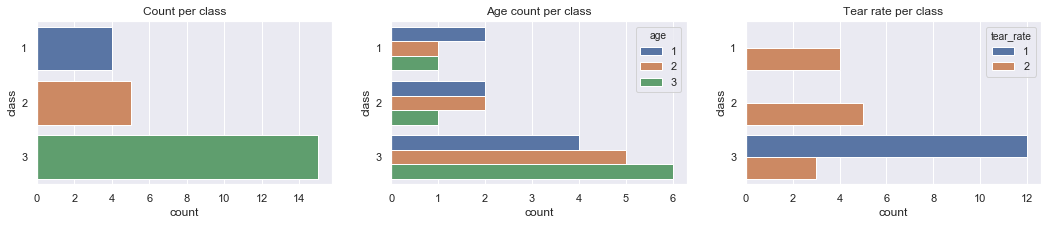

In [20]:
fig, axs = plt.subplots(ncols=3, figsize=(18,3))
sns.countplot(y='class', data=df1, ax=axs[0])
sns.countplot(y='class', hue='age', data=df1, ax=axs[1])
sns.countplot(y='class', hue='tear_rate', data=df1, ax=axs[2])
axs[0].set_title('Count per class')
axs[1].set_title('Age count per class')
axs[2].set_title('Tear rate per class')

### Let the NaiveBayes learner fit the data and print the probabilities

The dataset is very small so that some feature combinations do not occur.  
For example the record [1, 1, 1, 1] is only known to match class 3. Classes 1 and 2 would receive a probability of 0.0.  
To avoid 0.0 probabilities, smoothing can be used so that the absence of a record would still result in a small positive probability.  

In [21]:
nb1 = NaiveBayes()
nb1.fit(df1, target='class', smoothing='plus1')
nb1.p_

defaultdict(None,
            {'prior': defaultdict(None,
                         {3: 0.6153846153846154,
                          2: 0.23076923076923078,
                          1: 0.19230769230769232}),
             'likelihood': defaultdict(None,
                         {3: defaultdict(None,
                                      {'p_age_1': 0.29411764705882354,
                                       'p_age_2': 0.35294117647058826,
                                       'p_age_3': 0.4117647058823529,
                                       'p_prescription_1': 0.47058823529411764,
                                       'p_prescription_2': 0.5294117647058824,
                                       'p_astigmatic_1': 0.47058823529411764,
                                       'p_astigmatic_2': 0.5294117647058824,
                                       'p_tear_rate_1': 0.7647058823529411,
                                       'p_tear_rate_2': 0.23529411764705882}),
                  

<br>

**One can see that a small dataset like this can experience quite a large shift in probabilities with smoothing.**


**With plus1 smoothing:**
```
defaultdict(None,
            {'prior': defaultdict(None,
                         {3: 0.6153846153846154,
                          2: 0.23076923076923078,
                          1: 0.19230769230769232}),
             'likelihood': defaultdict(None,
                          ...
                          1: defaultdict(None,
                                      {'p_age_1': 0.5,
                                       'p_age_2': 0.3333333333333333,
                                       'p_age_3': 0.3333333333333333,
                                       'p_prescription_1': 0.6666666666666666,
                                       'p_prescription_2': 0.3333333333333333,
                                       'p_astigmatic_1': 0.16666666666666666,
                                       'p_astigmatic_2': 0.8333333333333334,
                                       'p_tear_rate_1': 0.16666666666666666,
                                       'p_tear_rate_2': 0.8333333333333334})}),
             ...
```


**Without smoothing:**

```
defaultdict(None,
            {'prior': defaultdict(None,
                         {3: 0.625,
                          2: 0.20833333333333334,
                          1: 0.16666666666666666}),
             'likelihood': defaultdict(None,
                          ...
                          1: defaultdict(None,
                                      {'p_age_1': 0.5,
                                       'p_age_2': 0.25,
                                       'p_age_3': 0.25,
                                       'p_prescription_1': 0.75,
                                       'p_prescription_2': 0.25,
                                       'p_astigmatic_1': 0.0,
                                       'p_astigmatic_2': 1.0,
                                       'p_tear_rate_1': 0.0,
                                       'p_tear_rate_2': 1.0})}),
             ...
```

<br>

The Naive Bayes `fit` function already populated the probability dictionary `p_` with all relevant probabilities.
Here are some sample calculations.

<br>

For calculating the **prior probabilities** we count how often a certain class occurs over all records. In total there are 24 records.

<br>

**Without smoothing:**
  
$P(c) = \frac{countClassRecords}{totalRecords}\ = \frac{countClassRecords}{24}\$

$P(1) = \frac{4}{24}\ = 0.16666666666666666$

$P(2) = \frac{5}{24}\ = 0.20833333333333334$

$P(3) = \frac{15}{24}\ = 0.625$

<br>

**With plus1 smooting:**  
Plus1 smoothing add `+1` to the nominator and `+2` to the denominator.  

$P(c) = \frac{countClassRecords + 1}{totalRecords + 2}\ = \frac{countClassRecords + 1}{26}\$

$P(1) = \frac{5}{26}\ = 0.19230769230769232$

$P(2) = \frac{6}{26}\ = 0.23076923076923078$

$P(3) = \frac{16}{26}\ = 0.6153846153846154$

<br>

Now, let's calculate the **conditional probabilities** for age per class (with smoothing)

             'likelihood': defaultdict(None,
                         {3: defaultdict(None,
                                      {'p_age_1': 0.29411764705882354,
                                       'p_age_2': 0.35294117647058826,
                                       'p_age_3': 0.4117647058823529,'

We know that class 3 has 15 records.
From the "age count per class diagram" we see, that within class 3 we have 4x age=1, 5x age=2 and 6x age=3.

The conditional probabilities are calculation as follows (still with plus1 smoothing):

$P(c) = \frac{countAgeXClassY + 1}{totalClass=Y + 2}\$

$P(age=1|class=3) = \frac{4 + 1}{15 + 2}\ = \frac{5}{17}\ = 0.29411764705882354$

$P(age=2|class=3) = \frac{5 + 1}{15 + 2}\ = \frac{6}{17}\ = 0.35294117647058826$

$P(age=3|class=3) = \frac{6 + 1}{15 + 2}\ = \frac{7}{17}\ = 0.4117647058823529$

<br>

Calculating the **probability of evidence** just involves the probabilities of each feature instances.  
For example, if `tear_rate=1` occurs in 12 out of 24 records, the associated **probability of evidence** = 0.5 .

#### Print Prior Probability table

In [22]:
priorTable = pd.DataFrame(data=nb1.p_['prior'].values(), index=nb1.p_['prior'].keys(), columns=['Prior'])

cm = sns.light_palette("blue", as_cmap=True)
sns_priorTable = priorTable.style.background_gradient(cmap=cm)
sns_priorTable

,Prior
3,0.615385
2,0.230769
1,0.192308


#### Print Likelihood of Evidence / Conditional Probability Table

In [23]:
likelihoodTable = pd.DataFrame(data=nb1.p_['likelihood'][1].values(), index=nb1.p_['likelihood'][1].keys(), columns=['P(E | c=1)'])
likelihoodTable['P(E | c=2)'] = nb1.p_['likelihood'][2].values()
likelihoodTable['P(E | c=3)'] = nb1.p_['likelihood'][3].values()

cm = sns.light_palette("blue", as_cmap=True)
sns_likelihoodTable = likelihoodTable.style.background_gradient(cmap=cm)
sns_likelihoodTable

,P(E | c=1),P(E | c=2),P(E | c=3)
p_age_1,0.5,0.428571,0.294118
p_age_2,0.333333,0.428571,0.352941
p_age_3,0.333333,0.285714,0.411765
p_prescription_1,0.666667,0.428571,0.470588
p_prescription_2,0.333333,0.571429,0.529412
p_astigmatic_1,0.166667,0.857143,0.470588
p_astigmatic_2,0.833333,0.142857,0.529412
p_tear_rate_1,0.166667,0.142857,0.764706
p_tear_rate_2,0.833333,0.857143,0.235294


#### Print Probability of evidence table

In [24]:
evidenceTable = pd.DataFrame(data=nb1.p_['evidence'].values(), index=nb1.p_['evidence'].keys(), columns=['Evidence'])

cm = sns.light_palette("blue", as_cmap=True)
sns_evidenceTable = evidenceTable.style.background_gradient(cmap=cm)
sns_evidenceTable

,Evidence
p_age_1,0.346154
p_age_2,0.346154
p_age_3,0.346154
p_prescription_1,0.5
p_prescription_2,0.5
p_astigmatic_1,0.5
p_astigmatic_2,0.5
p_tear_rate_1,0.5
p_tear_rate_2,0.5


#### Make single predictions for evidences provided.

In [25]:
evidences = {
    'age': '1',
    'prescription': '1',
    'astigmatic': '1',
    'tear_rate': '1'
}

c, pred = nb1.predict(evidences)
print(c, pred)

3 {3: 0.8147142897761581, 2: 0.13795598808759452, 1: 0.04732972213624749}


> As expected class "3" is predicted, because this was the only class seen for these evidences during the fit.  
> Smoothing ensures to still assign some (much lower) probability to classes 1 and 2.
>  
> Without smooting the response would have been:  
> `3 {3: 1.0, 2: 0.0, 1: 0.0}`

In [26]:
evidences = {
    'age': '1',
    'prescription': '1',
    'astigmatic': '1',
    'tear_rate': '2'
}

c, pred = nb1.predict(evidences)
print(c, pred)

2 {3: 0.19062263550470057, 2: 0.6294254563556048, 1: 0.1799519081396947}


<br>

From the dataset visualization we know that tear_rate=1 is a strong indicator for class 3.  
When changing the evidence to tear_rate=2, the class predictions change heavily and reflect the real dataset.

<br>

#### Lets now make predictions for the whole dataset

Note: The dataset discussion section further below elaborate why the dataset was not split into train and test set.

In [27]:
y_pred = []
y_true = list(df1['class'])

for index, row in df1.iterrows():
    evidences = {
        'age': row['age'],
        'prescription': row['prescription'],
        'astigmatic': row['astigmatic'],
        'tear_rate': row['tear_rate']
    }
    c, pred = nb1.predict(evidences)
    y_pred.append(c)

acc = accuracy_score(y_true, y_pred)
clr = classification_report(y_true, y_pred)
cm = confusion_matrix(y_pred, y_true, labels=[1, 2, 3])

print('y_true :', y_true)
print('y_preds:', y_pred)
print('\nAccuracy:', acc)
print('\nClassification report:\n', clr)

y_true : [3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3]
y_preds: [3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 3]

Accuracy: 0.9166666666666666

Classification report:
               precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.83      1.00      0.91         5
           3       1.00      0.87      0.93        15

    accuracy                           0.92        24
   macro avg       0.88      0.96      0.91        24
weighted avg       0.93      0.92      0.92        24



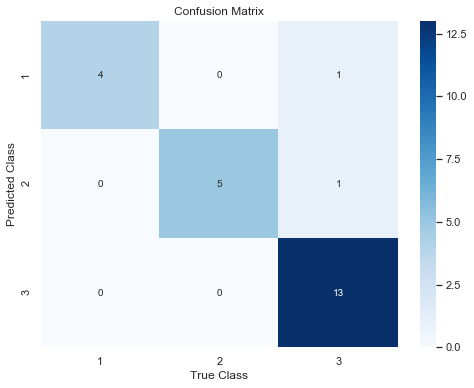

In [28]:
ticklabels = ['1', '2', '3']

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, xticklabels=ticklabels, yticklabels=ticklabels, cmap="Blues")

plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

<br>

Across the whole dataset the Naive Bayes learner was able to predict 22/24 or 91,67% correctly.  
The confusion matrix highlights that essentially 2 class 3 recods have been misclassified as class 1 and 2 respectively.  

<br>

Finally, let's quickly analyse the performance without smoothing.

In [29]:
nb1_1 = NaiveBayes()
nb1_1.fit(df1, target='class')

y_pred = []
y_true = list(df1['class'])

for index, row in df1.iterrows():
    evidences = {
        'age': row['age'],
        'prescription': row['prescription'],
        'astigmatic': row['astigmatic'],
        'tear_rate': row['tear_rate']
    }
    c, pred = nb1_1.predict(evidences)
    y_pred.append(c)

acc = accuracy_score(y_true, y_pred)
clr = classification_report(y_true, y_pred)
cm = confusion_matrix(y_pred, y_true, labels=[1, 2, 3])

print('y_true :', y_true)
print('y_preds:', y_pred)
print('\nAccuracy:', acc)
print('\nClassification report:\n', clr)

y_true : [3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3]
y_preds: [3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 3, 3, 2, 3, 1, 3, 2, 3, 3]

Accuracy: 0.9583333333333334

Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.83      1.00      0.91         5
           3       1.00      0.93      0.97        15

    accuracy                           0.96        24
   macro avg       0.94      0.98      0.96        24
weighted avg       0.97      0.96      0.96        24



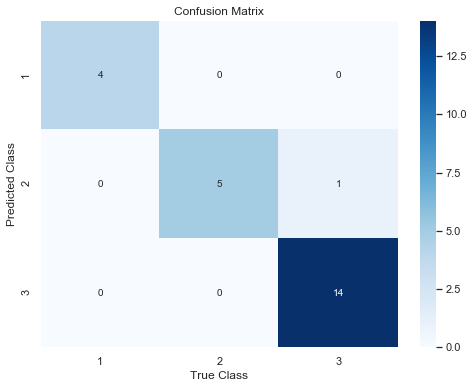

In [30]:
ticklabels = ['1', '2', '3']

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, xticklabels=ticklabels, yticklabels=ticklabels, cmap="Blues")

plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

<br>

The learner without smoothing performs slightly better on this very small dataset.  
It only misinterprets a single record of class 3 as class 2.

<br>

### Suitability of dataset

As mentioned above, the dataset is very very small and can be used for demonstrating concepts, but already the size  
of 24 records in total makes it a pretty lousy example to do fancy learning.  

In addition the inner structure of the dataset is heavily mocked up. 3 "age" groups split the dataset in 3x8 records.  
Hence, for each "age" group a full permutation of the other features is provided: 2^^3 = 8 records.  

In a classical machine learning example one would split the dataset into training and test set.  
Here, the size of the dataset is a limiting factor and leaving out certain records for training, will render the learner incapable of learning associated classes.  
 
Given the exhaustive nature of the record structure, the dataset looks like a translation from a rules-based system:  
> If tear_rate=1, then "class 3", else if age=1 and  ...  then ... , else ... 



---

### **Dataset 2**

**Balance Scale Data Set**  
http://archive.ics.uci.edu/ml/datasets/balance+scale

### Load dataset and print dataframe.

In [31]:
f2 = './ML_R00183658_DATA/balance-scale.data'
df2 = pd.read_csv(f2, delimiter=',', header=None, names=['class', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'])
df2

,class,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


Text(0.5, 1.0, 'Left-Distance value per class')

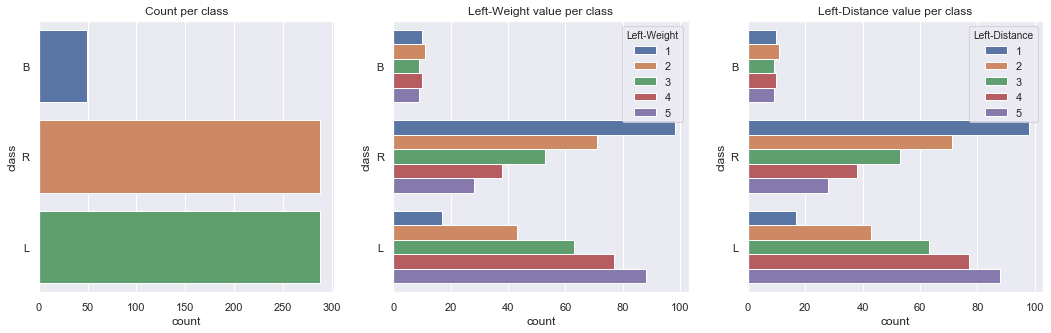

In [32]:
fig, axs = plt.subplots(ncols=3, figsize=(18,5))
sns.countplot(y='class', data=df2, ax=axs[0])
sns.countplot(y='class', hue='Left-Weight', data=df2, ax=axs[1])
sns.countplot(y='class', hue='Left-Distance', data=df2, ax=axs[2])
axs[0].set_title('Count per class')
axs[1].set_title('Left-Weight value per class')
axs[2].set_title('Left-Distance value per class')

**The dataset is large enogh so that we can properly split the dataset into training and test set.**  
  
**The plots above indicate a very strong inbalance in classes that will affect the prior probabilities of a Bayesian Learner.**  
**Therefore, the training set will contain 525 records, the test set will contain 100 records to have a certain number of class "B" records in the test set.**

In [33]:
idx = random.sample(range(1, df2.shape[0]), 100)
df2_train = df2.drop(idx)
df2_test = df2.loc[idx]

print(df2.shape)
print(df2_train.shape)
print(df2_test.shape)

(625, 5)
(525, 5)
(100, 5)


### Let the NaiveBayes learner fit the data and print the probabilities

Again, plus1 smoothing will be used.

In [34]:
nb2 = NaiveBayes()
nb2.fit(df2_train, target='class', smoothing='plus1')
nb2.p_

defaultdict(None,
            {'prior': defaultdict(None,
                         {'B': 0.0777988614800759,
                          'R': 0.4573055028462998,
                          'L': 0.4667931688804554}),
             'likelihood': defaultdict(None,
                         {'B': defaultdict(None,
                                      {'p_Left-Weight_1': 0.21428571428571427,
                                       'p_Left-Weight_2': 0.21428571428571427,
                                       'p_Left-Weight_3': 0.19047619047619047,
                                       'p_Left-Weight_4': 0.23809523809523808,
                                       'p_Left-Weight_5': 0.21428571428571427,
                                       'p_Left-Distance_1': 0.21428571428571427,
                                       'p_Left-Distance_2': 0.2619047619047619,
                                       'p_Left-Distance_3': 0.16666666666666666,
                                       'p_Left-Distance_

<br>
<strong style="color: red;">Note:</strong>

The same operations as manually explained for dataset 1 apply here for the 2nd dataset.  
I will not repeat the manual steps, but only print the 3 probability tables using pandas and seaborn.

<br>

In [35]:
priorTable2 = pd.DataFrame(data=nb2.p_['prior'].values(), index=nb2.p_['prior'].keys(), columns=['Prior'])

cm = sns.light_palette("blue", as_cmap=True)
sns_priorTable2 = priorTable2.style.background_gradient(cmap=cm)
sns_priorTable2

,Prior
B,0.0777989
R,0.457306
L,0.466793


In [36]:
likelihoodTable2 = pd.DataFrame(data=nb2.p_['likelihood']['B'].values(), index=nb2.p_['likelihood']['B'].keys(), columns=['P(c=B | E)'])
likelihoodTable2['P(c=L | E)'] = nb2.p_['likelihood']['L'].values()
likelihoodTable2['P(c=R | E)'] = nb2.p_['likelihood']['R'].values()

cm = sns.light_palette("blue", as_cmap=True)
sns_likelihoodTable2 = likelihoodTable2.style.background_gradient(cmap=cm)
sns_likelihoodTable2

,P(c=B | E),P(c=L | E),P(c=R | E)
p_Left-Weight_1,0.214286,0.0688259,0.355372
p_Left-Weight_2,0.214286,0.149798,0.231405
p_Left-Weight_3,0.190476,0.202429,0.173554
p_Left-Weight_4,0.238095,0.263158,0.144628
p_Left-Weight_5,0.214286,0.327935,0.107438
p_Left-Distance_1,0.214286,0.0607287,0.342975
p_Left-Distance_2,0.261905,0.149798,0.239669
p_Left-Distance_3,0.166667,0.214575,0.194215
p_Left-Distance_4,0.214286,0.263158,0.144628
p_Left-Distance_5,0.214286,0.323887,0.0909091


In [37]:
evidenceTable2 = pd.DataFrame(data=nb2.p_['evidence'].values(), index=nb2.p_['evidence'].keys(), columns=['P(E)'])

cm = sns.light_palette("blue", as_cmap=True)
sns_evidenceTable2 = evidenceTable2.style.background_gradient(cmap=cm)
sns_evidenceTable2

,P(E)
p_Left-Weight_1,0.208729
p_Left-Weight_2,0.189753
p_Left-Weight_3,0.185958
p_Left-Weight_4,0.204934
p_Left-Weight_5,0.216319
p_Left-Distance_1,0.199241
p_Left-Distance_2,0.197343
p_Left-Distance_3,0.199241
p_Left-Distance_4,0.203036
p_Left-Distance_5,0.206831


#### Make single predictions for evidences provided.

In [38]:
evidences = {
    'Left-Weight': '1',
    'Left-Distance': '1',
    'Right-Weight': '1',
    'Right-Distance': '1'
}

c, pred = nb2.predict(evidences)
print(c, pred)

L {'B': 0.27214941337010407, 'R': 0.3536965390556953, 'L': 0.3741540475742006}


> From the data learned, this record should be classified as "B".  
> However, the very small prior probability of class "B" causes the this record to be misclassified.  

<br>

Now, let's see what happens if we avoid the prior probability for predicting the class.

In [39]:
c, pred = nb2.predict(evidences, no_prior=True)
print(c, pred)

B {'B': 0.6895429697273645, 'R': 0.15245846990770082, 'L': 0.15799856036493481}


> Nice, now the the NB classifier correctly predicts the correct class B.

### Lets now make predictions for the whole dataset

To evaluate the impact of the prior in such unbalanced datasets, let's now run classification on the 100 test records and evaluate accuracy and confusion matrix. 

In [40]:
y_pred = []
y_true = list(df2_test['class'])

for index, row in df2_test.iterrows():
    evidences = {
        'Left-Weight': row['Left-Weight'],
        'Left-Distance': row['Left-Distance'],
        'Right-Weight': row['Right-Weight'],
        'Right-Distance': row['Right-Distance']
    }
    c, pred = nb2.predict(evidences)
    y_pred.append(c)

acc = accuracy_score(y_true, y_pred)
clr = classification_report(y_true, y_pred)
cm = confusion_matrix(y_pred, y_true, labels=['B', 'R', 'L'])

print('y_true :', y_true)
print('y_preds:', y_pred)
print('\nAccuracy:', acc)
print('\nClassification report:\n', clr)

y_true : ['R', 'L', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L', 'B', 'R', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'B', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'B', 'R', 'R', 'B', 'B', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'B', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B', 'R', 'R', 'R', 'B', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'B', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'R', 'L', 'L']
y_preds: ['R', 'L', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 

C:\Users\mikel\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


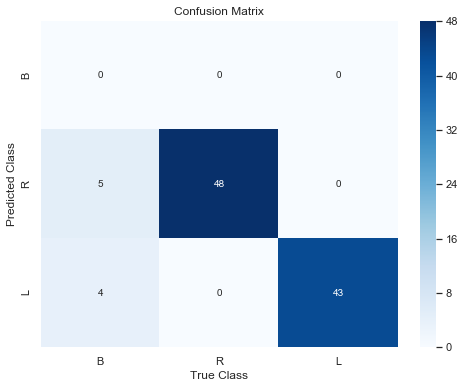

In [41]:
ticklabels = ['B', 'R', 'L']

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, xticklabels=ticklabels, yticklabels=ticklabels, cmap="Blues")

plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

> As expected!  
> Although the accuracy is ~0.9 the learner was not able to identify any record for class "B".
>
> While for classes L and R all predictions were correct, the predictions for class B were all incorrect.

<br>

#### Can we improve predictions on a larger scale by ignoring the prior probability?

In [42]:
y_pred = []
y_true = list(df2_test['class'])

for index, row in df2_test.iterrows():
    evidences = {
        'Left-Weight': row['Left-Weight'],
        'Left-Distance': row['Left-Distance'],
        'Right-Weight': row['Right-Weight'],
        'Right-Distance': row['Right-Distance']
    }
    c, pred = nb2.predict(evidences, no_prior=True)
    y_pred.append(c)

acc = accuracy_score(y_true, y_pred)
clr = classification_report(y_true, y_pred)
cm = confusion_matrix(y_pred, y_true, labels=['B', 'R', 'L'])

print('y_true :', y_true)
print('y_preds:', y_pred)
print('\nAccuracy:', acc)
print('\nClassification report:\n', clr)

y_true : ['R', 'L', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L', 'B', 'R', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'B', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'B', 'R', 'R', 'B', 'B', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'B', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B', 'R', 'R', 'R', 'B', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'B', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'R', 'L', 'L']
y_preds: ['B', 'B', 'R', 'R', 'R', 'B', 'B', 'R', 'L', 'L', 'B', 'B', 'R', 'L', 'R', 'B', 'R', 'B', 'R', 'L', 'R', 'B', 'R', 'B', 'L', 'B', 'L', 'R', 'R', 'L', 'B', 'R', 'R', 'R', 'R', 'B', 'B', 'L', 'B', 'L', 'B', 'B', 'L', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'L', 'L', 'B', 'B', 'B', 'R', 'R', 'R', 'R', 'L', 'L', 'B', 'B', 'R', 'B', 'R', 'B', 'L', 'B', 'L', 'B', 'L', 'B', 'B', 'B', 'R', 'R', 'L', 'L', 'B', 'B', 'B', 'B', 'B', 'B', 'L', 'B', 'R', 'B', 'L', 'B', 'B', 'L', 'R', 'L', 'L', 

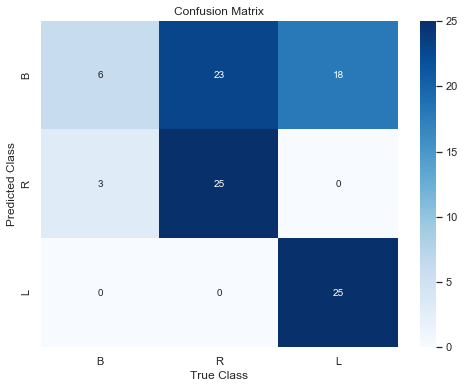

In [43]:
ticklabels = ['B', 'R', 'L']

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, xticklabels=ticklabels, yticklabels=ticklabels, cmap="Blues")

plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

**No! That was a too simple approach.**  
**While all/most (depending on random train/test set split) class B records are predicted correctly, the model performs very weakly on distinguishing classes "L" and "R" from class "B".**

### Suitability of dataset

On first sight, the dataset looked like a promising candidate for a Machine Learning algorithms. It includes a decent amount of records that allows the dataset to be split into proper train and test sets. However, the strong inbalance between the classes makes the dataset pretty unsuitable for a Bayesian Learner because the resulting very low prior probability of class "B" leads to a prediction bias towards the other 2 classes. With prior probabilities included in inference / prediction, classes "R" and "L" show very high Recall values, meaning that test records of these classes or correctly predicted as such. Recall for class "B" test entries however is 0.  

The idea to predict without prior probability improves the Recall rate for class "B", but it heavily reduces the Recall for the other 2 classes as the Learner now has problems to distinguish classes "R" and "L" from class "B".  

Basically, the low prior probability of class "B" simply reflects the difficulty of balancing a scale, which often tends to lean to either "Left" or "Right".

Other methods that usually help improve predictive power of machine learning algorithms, like scaling the features, do not apply to a Bayesian Learner as the underlying distributions will not be changed.

---

**Finally, let's see how a Support Vector Classifier would perform on the same train and test datasets**

In [44]:
from sklearn.svm import SVC
clf = SVC(C=9, gamma='scale')
clf.fit(df2_train.iloc[:, 1:], df2_train.iloc[:, 0])
y_pred = clf.predict(df2_test.iloc[:, 1:])

acc = accuracy_score(y_true, y_pred)
clr = classification_report(y_true, y_pred)
cm = confusion_matrix(y_pred, y_true, labels=['B', 'R', 'L'])

print('\nAccuracy:', acc)
print('\nClassification report:\n', clr)


Accuracy: 0.98

Classification report:
               precision    recall  f1-score   support

           B       0.82      1.00      0.90         9
           L       1.00      0.98      0.99        43
           R       1.00      0.98      0.99        48

    accuracy                           0.98       100
   macro avg       0.94      0.99      0.96       100
weighted avg       0.98      0.98      0.98       100



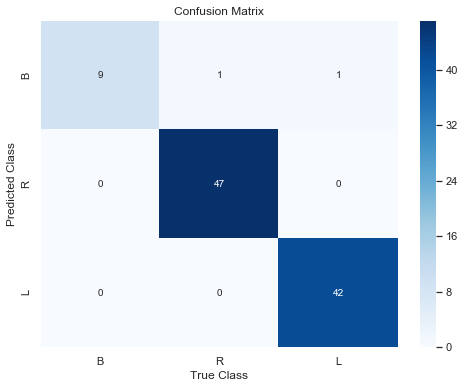

In [45]:
ticklabels = ['B', 'R', 'L']

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, xticklabels=ticklabels, yticklabels=ticklabels, cmap="Blues")

plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

This confirms that in general Machine Learning algorithms are able to learn the patterns inherent to the balance-scale dataset.  
The SVC shows 0.98 accuracy and very good recall for any given class.